After the dismal performance of unnormalized features we will normalize the features based on their thread. This is mostly a copy of the previous notebook. The change comes in the normalization of the features.

To get all of this to run correctly we need to be in the correct python environment. Using Anaconda Here are the steps:
- conda create -n tf tensorflow
- conda activate tf
- conda install pandas
- conda install matplotlib
- conda install jupyter
- conda install scikit-learn==0.21.2 #this was used to not get an error on a mac system

Unfortunately environment files are not easily transferred between platforms. Hopefully this 


In [1]:
import pandas as pd
import numpy as np
# import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xml_file = 'stackexchange_data/diy.stackexchange.com/Posts_original.xml'
originaldf = pd.read_xml(xml_file,attrs_only=True,parser='etree')
originaldf.describe()

,AcceptedAnswerId,AnswerCount,CommentCount,FavoriteCount,Id,LastEditorUserId,OwnerUserId,PostTypeId,Score,ViewCount,ParentId
count,22593.000000,64503.000000,173341.000000,7136.000000,173341.000000,60843.000000,171425.000000,173341.000000,173341.000000,64503.000000,108215.000000
mean,108373.832957,1.677674,1.950046,1.478840,118908.775829,34969.900580,48320.166283,1.637080,2.130540,4921.380509,110062.501077
std,70620.506794,1.453162,2.619226,2.210341,67767.548143,35088.478365,38686.024289,0.514955,4.200341,20640.046517,69797.636240
min,9.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,1.000000,-21.000000,4.000000,1.000000
25%,41791.000000,1.000000,0.000000,1.000000,62355.000000,2196.000000,14437.000000,1.000000,0.000000,100.000000,47171.000000
50%,106801.000000,1.000000,1.000000,1.000000,121874.000000,27773.000000,44366.000000,2.000000,1.000000,457.000000,108629.000000
75%,170870.000000,2.000000,3.000000,1.000000,177914.000000,55930.000000,74694.000000,2.000000,2.000000,2333.000000,171230.000000
max,234205.000000,77.000000,48.000000,74.000000,234210.000000,141224.000000,141255.000000,7.000000,300.000000,877087.000000,234198.000000


In [3]:
originaldf.describe(exclude=[np.number])

,Body,ContentLicense,CreationDate,LastActivityDate,LastEditDate,Tags,Title,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,ClosedDate
count,173169,173341,173341,173341,61226,64503,64503,2671,469,395,2440
unique,173154,3,172934,137337,57713,28755,64493,1260,406,105,2440
top,There's no need to use this tag. When asking ...,CC BY-SA 3.0,2011-10-16T21:46:14.993,2010-07-21T19:33:18.130,2020-06-16T10:07:27.010,<electrical>,Does this look like asbestos?,user558,2011-10-19T10:49:56.827,user39367,2012-09-11T19:17:04.623
freq,3,93808,2,2,1941,2761,2,238,9,68,1


In [4]:
originaldf.isna().sum()

AcceptedAnswerId         150748
AnswerCount              108838
Body                        172
CommentCount                  0
ContentLicense                0
CreationDate                  0
FavoriteCount            166205
Id                            0
LastActivityDate              0
LastEditDate             112115
LastEditorUserId         112498
OwnerUserId                1916
PostTypeId                    0
Score                         0
Tags                     108838
Title                    108838
ViewCount                108838
ParentId                  65126
OwnerDisplayName         170670
CommunityOwnedDate       172872
LastEditorDisplayName    172946
ClosedDate               170901
dtype: int64

according to survey characteristics of good answers are :
- More varied vocabulary
- Answers referenced by other answers
- More comments from other users
- Earlier posted answers are likely to be better
- Answer most different from the rest
- Answer length (best)
- Forum specific
 easiest to look at are the answer length, time of posting and number of comments from other users.
goal of this research is to find best answer. More interesting features are answers that are different from the rest. How to calculate answer similarity remains to be seen..
###### start with comment count, answer length and time of posting? easy low hanging fruit

In [56]:
#a look at the columns that might help us to get to these 
#body will give us word count
originaldf[['Body','CreationDate','CommentCount']]

,Body,CreationDate,CommentCount
0,I'm looking to finish my basement and simply w...,2010-07-21 19:14:06,1
1,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,0
2,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,0
3,"Other than looking up blue prints, which many ...",2010-07-21 19:16:23,1
4,I have a number of outlets that are old and wo...,2010-07-21 19:16:48,1
...,...,...,...
173336,I have an alcove I want to install some floati...,2021-09-05 01:27:37,1
173337,Summarize the problem\nMy 35 year-old home's w...,2021-09-05 02:31:01,0
173338,"First, I'm going to try and describe the curre...",2021-09-05 02:32:28,0
173339,I need some help with confirming the wiring in...,2021-09-05 03:29:05,2


In [5]:
#look at answers
originaldf.loc[originaldf['PostTypeId'] == 2].shape

(108215, 22)

In [6]:
#look at number of questions
originaldf.loc[originaldf["PostTypeId"] == 1].shape

(64503, 22)

In [7]:
#look at missing values
originaldf.loc[originaldf["PostTypeId"] == 1].isna().sum()

AcceptedAnswerId         41910
AnswerCount                  0
Body                         0
CommentCount                 0
ContentLicense               0
CreationDate                 0
FavoriteCount            57367
Id                           0
LastActivityDate             0
LastEditDate             31375
LastEditorUserId         31502
OwnerUserId                656
PostTypeId                   0
Score                        0
Tags                         0
Title                        0
ViewCount                    0
ParentId                 64503
OwnerDisplayName         63386
CommunityOwnedDate       64475
LastEditorDisplayName    64372
ClosedDate               62063
dtype: int64

In [8]:
#look at missing values
originaldf.loc[originaldf["PostTypeId"] == 2].isna().sum()

AcceptedAnswerId         108215
AnswerCount              108215
Body                          0
CommentCount                  0
ContentLicense                0
CreationDate                  0
FavoriteCount            108215
Id                            0
LastActivityDate              0
LastEditDate              80740
LastEditorUserId          80996
OwnerUserId                1260
PostTypeId                    0
Score                         0
Tags                     108215
Title                    108215
ViewCount                108215
ParentId                      0
OwnerDisplayName         106661
CommunityOwnedDate       107790
LastEditorDisplayName    107951
ClosedDate               108215
dtype: int64

In [9]:
#html tags in body columns with blank space
originaldf.Body = originaldf.Body.str.replace('<[^>]*>','', regex=True)

In [10]:
# Need a difference between answer posting time and question posting time

from datetime import datetime 

datestrings = originaldf.CreationDate.str.slice_replace(start=-4)

dateObjects = []
for i in range(len(datestrings)):
    dateObjects.append(datetime.strptime(datestrings[i],'%Y-%m-%dT%H:%M:%S'))
    
originaldf.CreationDate = dateObjects

In [11]:
# want the question posting time for each answer
# so merge each answer with its question along with the body and creation date of the question
df = pd.merge(left=originaldf.loc[originaldf['PostTypeId'] == 2,
                  ['Id', 'CreationDate','Body','CommentCount','ParentId']],
                  right=originaldf[['Id','AcceptedAnswerId', 'Body',
                                    'CreationDate','AnswerCount']],  
                  left_on="ParentId", right_on="Id", how="left", 
                  suffixes=("_answer", "_question"))

In [12]:
#Assume that if there are no AcceptedAnswerId for the question then it is not a good example
df.dropna(subset=["AcceptedAnswerId"],inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
# if the id of the accepted answer for a question is the row's answer id 
# then that row is accepted answer

df['is_accepted_answer'] = df.Id_answer == df.AcceptedAnswerId

In [14]:
#the count of unique accepted answers should be equal to the sum of "is_accepted_answer"
len(df.AcceptedAnswerId.unique()) == df.is_accepted_answer.sum()

True

In [15]:
#the count of unique questions should also be equal to the sum of "is_accepted_answer"
len(df.Id_question.unique()) == df.is_accepted_answer.sum()

True

In [16]:
# calculate the difference between when the question and answers were posted
df['time_difference'] = df.CreationDate_answer - df.CreationDate_question

time_difference_in_seconds = []

for i in range(len(df.time_difference)):
        time_difference_in_seconds.append(df.time_difference[i].total_seconds())
        
df.time_difference = time_difference_in_seconds

In [17]:
df.describe()

,Id_answer,CommentCount,ParentId,Id_question,AcceptedAnswerId,AnswerCount,time_difference
count,46189.000000,46189.000000,46189.000000,46189.000000,46189.000000,46189.000000,4.618900e+04
mean,105381.628808,1.630821,97270.021196,97270.021196,98457.055619,3.235164,1.289551e+07
std,71227.945336,2.304975,72819.688767,72819.688767,72947.542389,2.659267,4.103870e+07
min,9.000000,0.000000,1.000000,1.000000,9.000000,1.000000,0.000000e+00
25%,38520.000000,0.000000,26454.000000,26454.000000,27136.000000,2.000000,3.382000e+03
50%,102446.000000,1.000000,89652.000000,89652.000000,91110.000000,2.000000,1.651600e+04
75%,169178.000000,2.000000,162114.000000,162114.000000,164504.000000,4.000000,1.013340e+05
max,234205.000000,45.000000,234187.000000,234187.000000,234205.000000,28.000000,3.504101e+08


In [18]:
len(df.Id_question.unique())

22593

So it looks like only ~22000 of the ~64000 questions have chosen answers. As there won't be reliable examples of chosen answers for the remaining 42000 we have removed them from the training set. (above)

In [19]:
df.shape

(46189, 12)

In [20]:
df.drop(['ParentId'], axis=1, inplace=True)

In [21]:
answer_lengths = []
for body in df.Body_answer:
    answer_lengths.append(len(body.split()))
df['answer_length'] = answer_lengths

In [22]:
df.head()

,Id_answer,CreationDate_answer,Body_answer,CommentCount,Id_question,AcceptedAnswerId,Body_question,CreationDate_question,AnswerCount,is_accepted_answer,time_difference,answer_length
0,9,2010-07-21 19:19:02,"I've found that it works OK, but it's more dif...",1,3,9.0,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,16.0,True,159.0,48
1,12,2010-07-21 19:20:53,"I have used it for patching areas, but not for...",0,3,9.0,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,16.0,False,270.0,37
2,13,2010-07-21 19:21:15,I just caulked my shower last night. I used GE...,3,2,13.0,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,3.0,True,358.0,81
3,14,2010-07-21 19:21:41,"It's just an ornamental wall it sounds like, s...",3,1,38.0,I'm looking to finish my basement and simply w...,2010-07-21 19:14:06,2.0,False,455.0,56
4,15,2010-07-21 19:22:00,I just bought a permanent silicone product by ...,3,2,13.0,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,3.0,False,403.0,30


In [53]:
df[['CommentCount', 'time_difference','answer_length']].describe()

,CommentCount,time_difference,answer_length
count,46189.000000,4.618900e+04,46189.000000
mean,1.630821,1.289551e+07,139.833986
std,2.304975,4.103870e+07,139.520765
min,0.000000,0.000000e+00,2.000000
25%,0.000000,3.382000e+03,59.000000
50%,1.000000,1.651600e+04,102.000000
75%,2.000000,1.013340e+05,173.000000
max,45.000000,3.504101e+08,4935.000000


## Normalization of features by thread

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

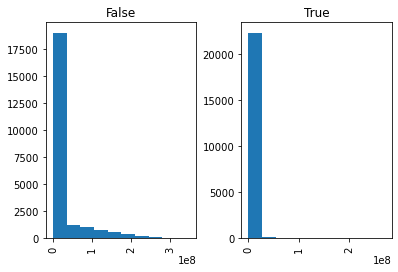

In [23]:
df['time_difference'].hist(by=df.is_accepted_answer)

Due to the left skewness of the data we could apply a log or a root to scale it better. Somehow a few of the answers were posted in the same second as the question, so a log will not work, however an even powered root can work here.

<AxesSubplot:>

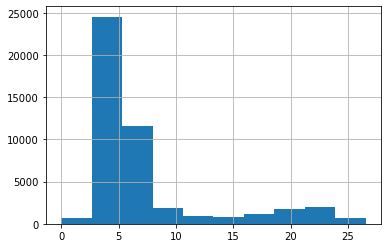

In [24]:
(df['time_difference']**(1/6)).hist()

<AxesSubplot:>

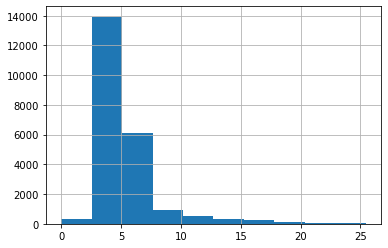

In [25]:
(df.loc[df.is_accepted_answer == 1]['time_difference']**(1/6)).hist()

<AxesSubplot:>

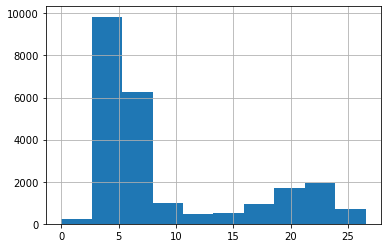

In [26]:
(df.loc[df.is_accepted_answer == 0]['time_difference']**(1/6)).hist()

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

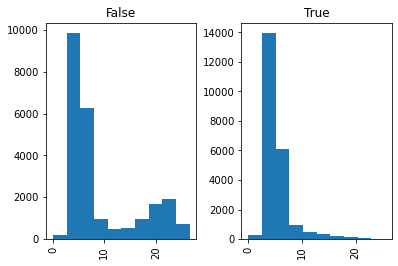

In [57]:
(df['time_difference']**(1/6)).hist(by=df.is_accepted_answer)

In [27]:
df.head()

,Id_answer,CreationDate_answer,Body_answer,CommentCount,Id_question,AcceptedAnswerId,Body_question,CreationDate_question,AnswerCount,is_accepted_answer,time_difference,answer_length
0,9,2010-07-21 19:19:02,"I've found that it works OK, but it's more dif...",1,3,9.0,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,16.0,True,159.0,48
1,12,2010-07-21 19:20:53,"I have used it for patching areas, but not for...",0,3,9.0,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,16.0,False,270.0,37
2,13,2010-07-21 19:21:15,I just caulked my shower last night. I used GE...,3,2,13.0,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,3.0,True,358.0,81
3,14,2010-07-21 19:21:41,"It's just an ornamental wall it sounds like, s...",3,1,38.0,I'm looking to finish my basement and simply w...,2010-07-21 19:14:06,2.0,False,455.0,56
4,15,2010-07-21 19:22:00,I just bought a permanent silicone product by ...,3,2,13.0,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,3.0,False,403.0,30


In [28]:
# it looks like this will do not too badly for scaling.
#we can apply a by thread normalization now.
#write a function to do a maxmin scaling by thread
def maxminByThread(df,column_name):
    grouped_df = df.groupby(['Id_question'])[column_name]
    max_df = grouped_df.max().to_frame(name=column_name + '_max')
    min_df = grouped_df.min().to_frame(name=column_name + '_min')
#     max_series = grouped_df.max()
#     min_series = grouped_df.min()
    diff_df = pd.merge(left=max_df,right=min_df, on="Id_question")
    diff_df[column_name + '_difference'] = max_df[column_name + '_max'] - min_df[column_name + '_min']
    
    df = pd.merge(left=df, right=diff_df, on="Id_question", how="left")
    minmax = (df[column_name] - df[column_name + '_min']) / df[column_name + '_difference']
    minmax[minmax.isna()] = 0
#     diff = max_series - min_series
    # subtract the min from the root_time_difference and divide by difference between
    # max and min. 
#     maxmin_scaled = (df[column_name] - min_series) / diff
#     maxmin_scaled
    return minmax

In [29]:
#first calculate the max grouped by thread (question_id)
df['root_time_difference'] = df.time_difference**(1/6)

In [30]:
df['root_time_difference']

0        2.327553
1        2.542303
2        2.664693
3        2.773332
4        2.717800
           ...   
46184    3.854009
46185    6.603523
46186    4.637790
46187    6.512638
46188    5.182244
Name: root_time_difference, Length: 46189, dtype: float64

In [31]:
feature_names = []
for each in ['CommentCount', 'root_time_difference', 'answer_length']:
    feature_names.append('minmax_scaled_'+ each)
    df['minmax_scaled_' + each] = maxminByThread(df,each)


In [32]:
df.head()

,Id_answer,CreationDate_answer,Body_answer,CommentCount,Id_question,AcceptedAnswerId,Body_question,CreationDate_question,AnswerCount,is_accepted_answer,time_difference,answer_length,root_time_difference,minmax_scaled_CommentCount,minmax_scaled_root_time_difference,minmax_scaled_answer_length
0,9,2010-07-21 19:19:02,"I've found that it works OK, but it's more dif...",1,3,9.0,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,16.0,True,159.0,48,2.327553,0.333333,0.00000,0.122807
1,12,2010-07-21 19:20:53,"I have used it for patching areas, but not for...",0,3,9.0,I'm going to be doing some drywalling shortly ...,2010-07-21 19:16:23,16.0,False,270.0,37,2.542303,0.000000,0.00963,0.084211
2,13,2010-07-21 19:21:15,I just caulked my shower last night. I used GE...,3,2,13.0,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,3.0,True,358.0,81,2.664693,0.000000,0.00000,0.170000
3,14,2010-07-21 19:21:41,"It's just an ornamental wall it sounds like, s...",3,1,38.0,I'm looking to finish my basement and simply w...,2010-07-21 19:14:06,2.0,False,455.0,56,2.773332,0.000000,0.00000,0.000000
4,15,2010-07-21 19:22:00,I just bought a permanent silicone product by ...,3,2,13.0,I would like to recaulk between the bathtub an...,2010-07-21 19:15:17,3.0,False,403.0,30,2.717800,0.000000,0.00251,0.000000


In [69]:
df[['minmax_scaled_CommentCount', 'minmax_scaled_root_time_difference', 'minmax_scaled_answer_length']].describe()

,minmax_scaled_CommentCount,minmax_scaled_root_time_difference,minmax_scaled_answer_length
count,46189.000000,46189.000000,46189.000000
mean,0.271149,0.372580,0.347954
std,0.419422,0.450733,0.432412
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.009168,0.023377
75%,0.555556,1.000000,1.000000
max,1.000000,1.000000,1.000000


# Training The Neural Network
In previous notebooks we have done some feature generation. As before, it stands right now that there is no association between different answers that are in the same thread. The features now have been scaled relative to their thread, however, and a better result has been obtained than without the scaling. A random search of network parameters is performed in this section. After a few iterations we will see if we can get better performance from the network.


In [33]:
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [34]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [35]:
# do a train test split on the data
test_size = 0.2
train_full_size = 1-test_size
dev_size = test_size/train_full_size
# get the features discussed above
necessary_to_calculate_features = df[feature_names]
labels = df.is_accepted_answer

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# From: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
X_train_full, X_test, y_train_full, y_test = train_test_split(necessary_to_calculate_features, labels,test_size=test_size,stratify=labels,random_state=92)

/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

In [38]:
# also create a dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full,test_size=dev_size,stratify=y_train_full,random_state=11)

/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

In [77]:
y_train.to_csv('y_train.csv', index = False)

In [58]:
#make a tunable model factory
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=X_train.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [59]:
import os
root_logdir = os.path.join(os.curdir, "my_logs") #'./my_logs/' in MacOS

# this function creates a time for the log # e.g., './my_logs/run_2019_06_07-15_15_22'
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

#create the callback for early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#create the tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())

In [60]:
#set up the randomized search
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": tuple([0, 1, 2, 3]),
    "n_neurons": tuple(np.arange(1, 100))
#     "learning_rate": reciprocal(3e-4, 3e-2), # going to be choosing a random number between these values for the learning rate
}

rnd_search_cv = RandomizedSearchCV(KerasClassifier(build_fn=build_model), param_distribs, n_iter=1, cv=2)
rnd_search_cv.fit(X_train.values, y_train.values, epochs=100,
                  validation_data=(X_dev.values, y_dev.values),
                  callbacks=[early_stopping_cb, tensorboard_cb])

/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/model_selection/_search.py:269: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=rnd):
/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you w

Train on 13856 samples, validate on 9238 samples
Epoch 1/100
 1024/13856 [=>............................] - ETA: 16s - loss: 0.6858 - accuracy: 0.6025

2021-12-08 17:07:30.671025: I tensorflow/core/profiler/lib/profiler_session.cc:184] Profiler session started.


13856/13856 [==============================] - 5s 358us/sample - loss: 0.6786 - accuracy: 0.6827 - val_loss: 0.6698 - val_accuracy: 0.7151
Epoch 2/100
13856/13856 [==============================] - 2s 154us/sample - loss: 0.6632 - accuracy: 0.7101 - val_loss: 0.6568 - val_accuracy: 0.7042
Epoch 3/100
13856/13856 [==============================] - 2s 155us/sample - loss: 0.6515 - accuracy: 0.6969 - val_loss: 0.6459 - val_accuracy: 0.6910
Epoch 4/100
13856/13856 [==============================] - 2s 152us/sample - loss: 0.6416 - accuracy: 0.6983 - val_loss: 0.6364 - val_accuracy: 0.7094
Epoch 5/100
13856/13856 [==============================] - 2s 152us/sample - loss: 0.6329 - accuracy: 0.7084 - val_loss: 0.6283 - val_accuracy: 0.7033
Epoch 6/100
13856/13856 [==============================] - 3s 188us/sample - loss: 0.6255 - accuracy: 0.7070 - val_loss: 0.6212 - val_accuracy: 0.7057
Epoch 7/100
13856/13856 [==============================] - 2s 171us/sample - loss: 0.6191 - accuracy: 0.70

13856/13856 [==============================] - 2s 145us/sample - loss: 0.5604 - accuracy: 0.7109 - val_loss: 0.5611 - val_accuracy: 0.7074
Epoch 56/100
13856/13856 [==============================] - 2s 142us/sample - loss: 0.5598 - accuracy: 0.7118 - val_loss: 0.5605 - val_accuracy: 0.7088
Epoch 57/100
13856/13856 [==============================] - 2s 158us/sample - loss: 0.5593 - accuracy: 0.7130 - val_loss: 0.5600 - val_accuracy: 0.7091
Epoch 58/100
13856/13856 [==============================] - 2s 141us/sample - loss: 0.5587 - accuracy: 0.7131 - val_loss: 0.5595 - val_accuracy: 0.7098
Epoch 59/100
13856/13856 [==============================] - 2s 146us/sample - loss: 0.5581 - accuracy: 0.7140 - val_loss: 0.5590 - val_accuracy: 0.7111
Epoch 60/100
13856/13856 [==============================] - 2s 144us/sample - loss: 0.5576 - accuracy: 0.7147 - val_loss: 0.5584 - val_accuracy: 0.7111
Epoch 61/100
13856/13856 [==============================] - 2s 144us/sample - loss: 0.5571 - accuracy

Train on 13857 samples, validate on 9238 samples
Epoch 1/100
13857/13857 [==============================] - 4s 264us/sample - loss: 0.6788 - accuracy: 0.7024 - val_loss: 0.6677 - val_accuracy: 0.7015
Epoch 2/100
13857/13857 [==============================] - 2s 156us/sample - loss: 0.6601 - accuracy: 0.6965 - val_loss: 0.6512 - val_accuracy: 0.7136
Epoch 3/100
13857/13857 [==============================] - 2s 172us/sample - loss: 0.6458 - accuracy: 0.7063 - val_loss: 0.6383 - val_accuracy: 0.6984
Epoch 4/100
13857/13857 [==============================] - 2s 156us/sample - loss: 0.6341 - accuracy: 0.6936 - val_loss: 0.6274 - val_accuracy: 0.6925
Epoch 5/100
13857/13857 [==============================] - 2s 154us/sample - loss: 0.6243 - accuracy: 0.6922 - val_loss: 0.6182 - val_accuracy: 0.6947
Epoch 6/100
13857/13857 [==============================] - 2s 154us/sample - loss: 0.6162 - accuracy: 0.6895 - val_loss: 0.6109 - val_accuracy: 0.6903
Epoch 7/100
13857/13857 [====================

/Users/chris/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/model_selection/_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Train on 27713 samples, validate on 9238 samples
Epoch 1/100
27713/27713 [==============================] - 5s 188us/sample - loss: 0.6819 - accuracy: 0.5970 - val_loss: 0.6670 - val_accuracy: 0.7413
Epoch 2/100
27713/27713 [==============================] - 4s 131us/sample - loss: 0.6572 - accuracy: 0.7290 - val_loss: 0.6465 - val_accuracy: 0.7147
Epoch 3/100
27713/27713 [==============================] - 5s 177us/sample - loss: 0.6384 - accuracy: 0.7059 - val_loss: 0.6286 - val_accuracy: 0.7045
Epoch 4/100
27713/27713 [==============================] - 7s 238us/sample - loss: 0.6224 - accuracy: 0.6960 - val_loss: 0.6142 - val_accuracy: 0.6965
Epoch 5/100
27713/27713 [==============================] - 4s 156us/sample - loss: 0.6107 - accuracy: 0.6902 - val_loss: 0.6042 - val_accuracy: 0.6932
Epoch 6/100
27713/27713 [==============================] - 4s 162us/sample - loss: 0.6024 - accuracy: 0.6875 - val_loss: 0.5972 - val_accuracy: 0.6916
Epoch 7/100
27713/27713 [====================

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f84acfc95d0>,
                   iid='warn', n_iter=1, n_jobs=None,
                   param_distributions={'n_hidden': (0, 1, 2, 3),
                                        'n_neurons': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [42]:
rnd_search_cv

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f84ae735810>,
                   iid='warn', n_iter=1, n_jobs=None,
                   param_distributions={'n_hidden': (0, 1, 2, 3),
                                        'n_neurons': (1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [61]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 24117), started 1:32:21 ago. (Use '!kill 24117' to kill it.)

In [62]:
rnd_search_cv.best_params_
# since this searches a random subset of possibilities then 
# it will return a different best option every time.
# at one point it returned n_neurons: 94 and n_hidden: 2, so we will stick with that

{'n_neurons': 94, 'n_hidden': 2}

In [63]:
model = build_model(n_neurons=94, n_hidden=2)

In [65]:
history = model.fit(X_train.values, y_train.values, epochs=100,validation_data=(X_dev.values, y_dev.values), callbacks=[early_stopping_cb])

Train on 27713 samples, validate on 9238 samples
Epoch 1/100
27713/27713 [==============================] - 5s 163us/sample - loss: 0.5812 - accuracy: 0.6883 - val_loss: 0.5788 - val_accuracy: 0.6904
Epoch 2/100
27713/27713 [==============================] - 4s 139us/sample - loss: 0.5790 - accuracy: 0.6901 - val_loss: 0.5769 - val_accuracy: 0.6903
Epoch 3/100
27713/27713 [==============================] - 4s 138us/sample - loss: 0.5769 - accuracy: 0.6912 - val_loss: 0.5749 - val_accuracy: 0.6901
Epoch 4/100
27713/27713 [==============================] - 4s 136us/sample - loss: 0.5750 - accuracy: 0.6922 - val_loss: 0.5735 - val_accuracy: 0.6898
Epoch 5/100
27713/27713 [==============================] - 4s 137us/sample - loss: 0.5732 - accuracy: 0.6931 - val_loss: 0.5715 - val_accuracy: 0.6913
Epoch 6/100
27713/27713 [==============================] - 4s 132us/sample - loss: 0.5715 - accuracy: 0.6931 - val_loss: 0.5699 - val_accuracy: 0.6938
Epoch 7/100
27713/27713 [====================

In [66]:
y_test_pred = model.predict_classes(X_test.values)

In [67]:
from sklearn.metrics import classification_report

In [68]:
#trying the prediction on the test data.
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.75      0.78      0.77      4719
        True       0.76      0.73      0.75      4519

    accuracy                           0.76      9238
   macro avg       0.76      0.76      0.76      9238
weighted avg       0.76      0.76      0.76      9238

